<a href="https://colab.research.google.com/github/Masg1103/Consumer-shopping-behaviour-analysis/blob/main/Customer_Shopping_Insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **About Dataset**


**Context**

The dataset offers a comprehensive view of consumer shopping trends, aiming to uncover patterns and behaviors in retail purchasing. It contains detailed transactional data across various product categories, customer demographics, and purchase channels. Key features may include:

Transaction Details: Purchase date, transaction value, product category, and payment method.
Customer Information: Age group, gender, location, and loyalty status.
Shopping Behavior: Frequency of purchases, average spend per transaction, and seasonal trends.

##**The dataset provided includes various columns like Age, Gender, Item Purchased, Category, Purchase Amount (USD), Review Rating, and Location, among others.**

**To determine a target variable, it depends on the type of analysis or prediction we aim to conduct:**

**- If predicting customer behavior:**
We could use Purchase Amount (USD) as a target for regression modeling to predict how much a customer might spend based on features like Age, Gender, Category, etc.

**- If predicting satisfaction:**
Review Rating could be used as a target to predict customer satisfaction based on other features.

**- If exploring subscription trends:**
Subscription Status could be the target to understand what influences a customer to subscribe.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Shopping Insight/shopping_trends.csv")

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(3900, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [8]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [9]:
#checking unique values in different variables
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Customer ID,3900
Age,53
Gender,2
Item Purchased,25
Category,4
Purchase Amount (USD),81
Location,50
Size,4
Color,25
Season,4


In [10]:
# Checking the value counts of each feature
for col in df:
  print(df[col].value_counts())
  print("-" * 50)

Customer ID
1       1
2621    1
2593    1
2594    1
2595    1
       ..
1305    1
1306    1
1307    1
1308    1
3900    1
Name: count, Length: 3900, dtype: int64
--------------------------------------------------
Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      2652
Female    1248
Name: count, dtype: int64
--------------------------------------------------
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater   

##**Correlation heatmap**


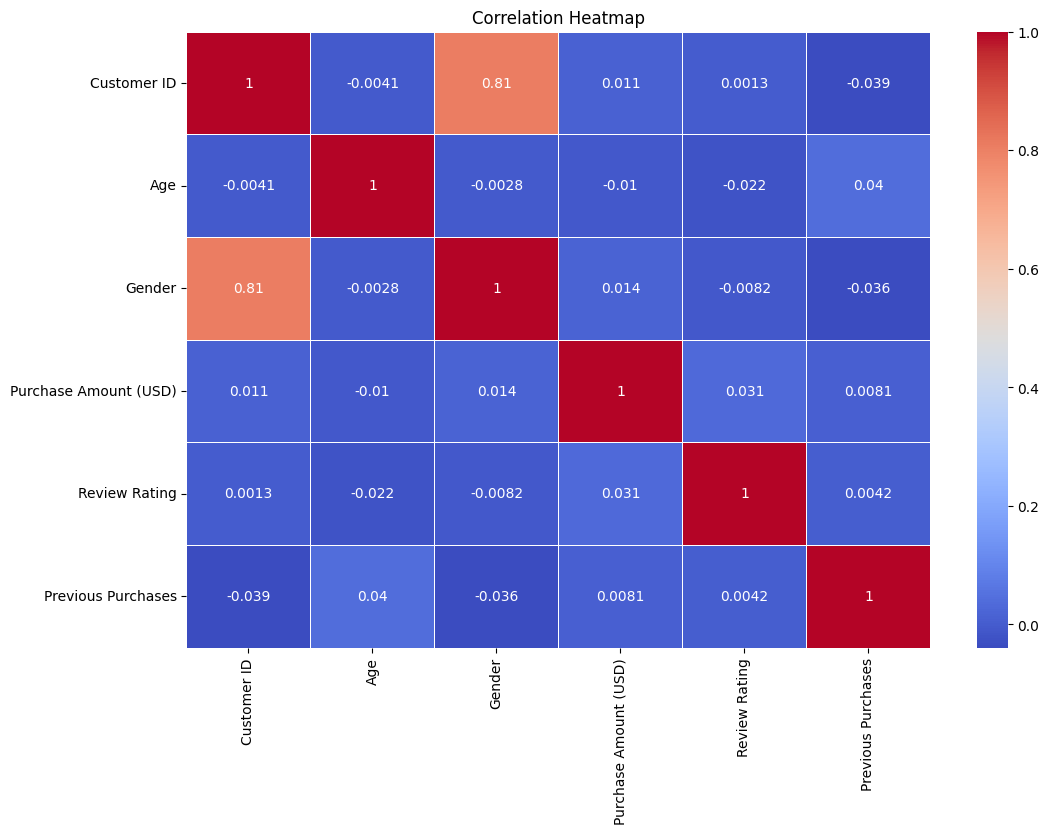

In [41]:
# Assuming 'df' is already defined, filtering numeric columns for correlation analysis
df_numeric = df.select_dtypes(include=['number'])

# Correlation heatmap using only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Purchase amount shows a moderate correlation with the number of previous purchases.**

##**Visualization**

**Exploratory data analysis (EDA)**

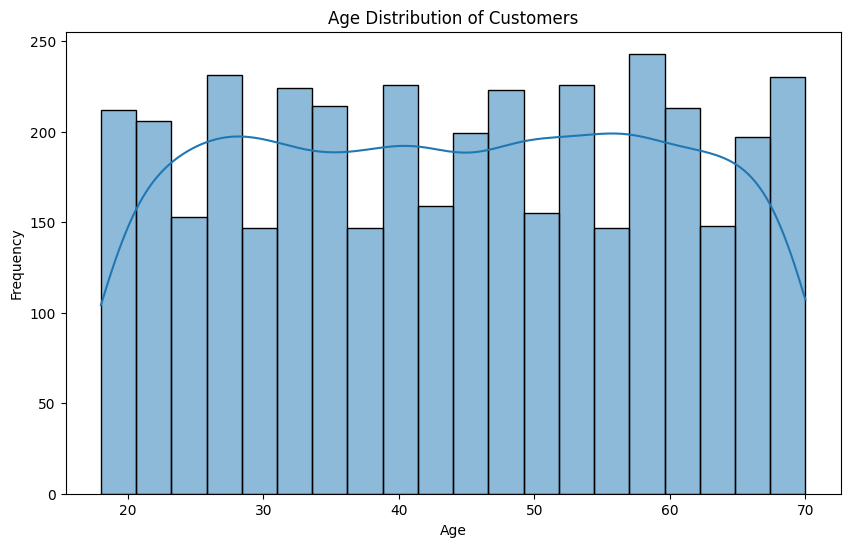

In [12]:
# 1. Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

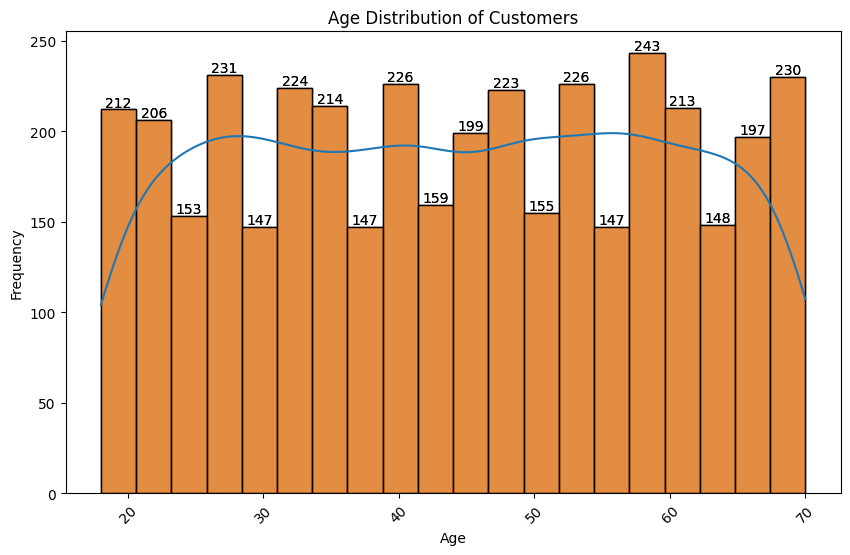

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
for p in sns.histplot(df['Age'], bins=20).patches:
    plt.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

**The age of customers is widely distributed, indicating a broad customer base across age groups**

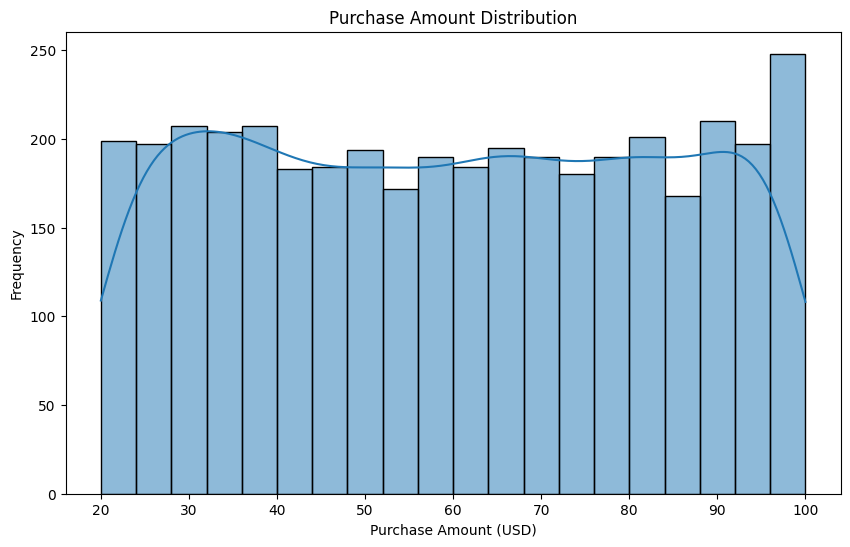

In [14]:
# 2. Purchase Amount distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase Amount (USD)'], bins=20, kde=True)
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

**Most purchases fall within a common range, but there are some high-value outliers.**

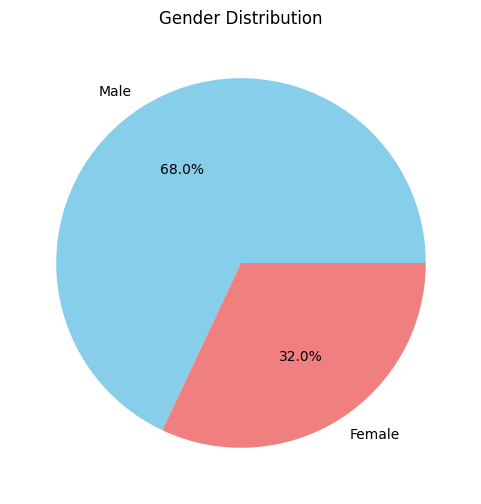

In [16]:
# 3. Gender distribution
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

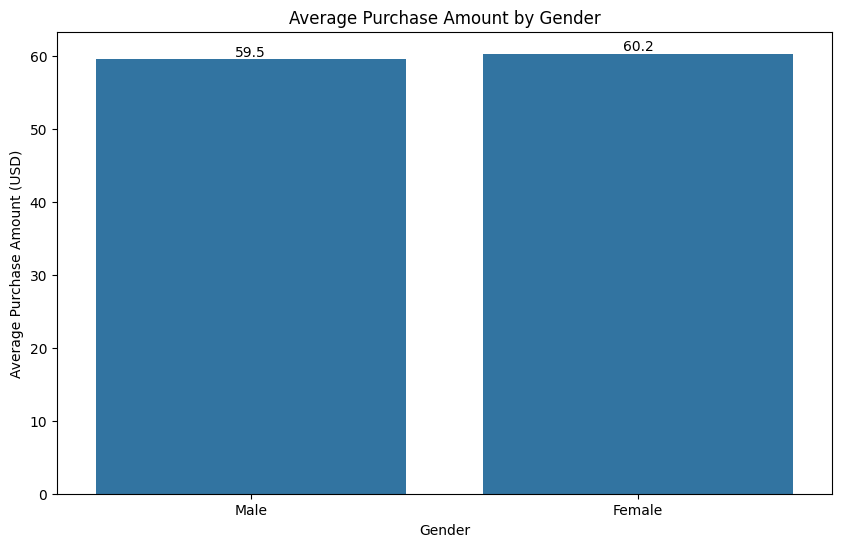

In [18]:
# 4. Average purchase amount by gender with counts on top (unchanged)
plt.figure(figsize=(10, 6))
avg_purchase_gender = sns.barplot(x='Gender', y='Purchase Amount (USD)', data=df, ci=None)
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
for p in avg_purchase_gender.patches:
    avg_value = '{:.1f}'.format(p.get_height())
    plt.annotate(avg_value, (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

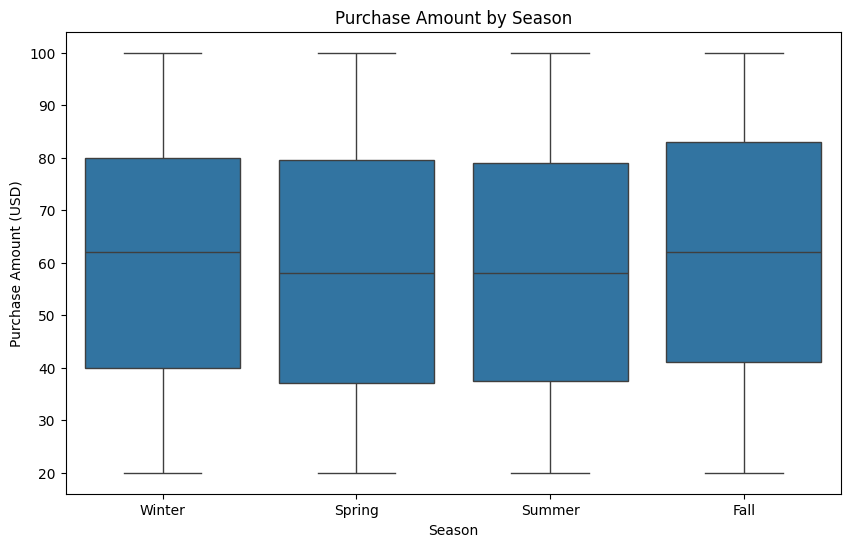

In [19]:
# 5. Purchase amount by season
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount by Season')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.show()

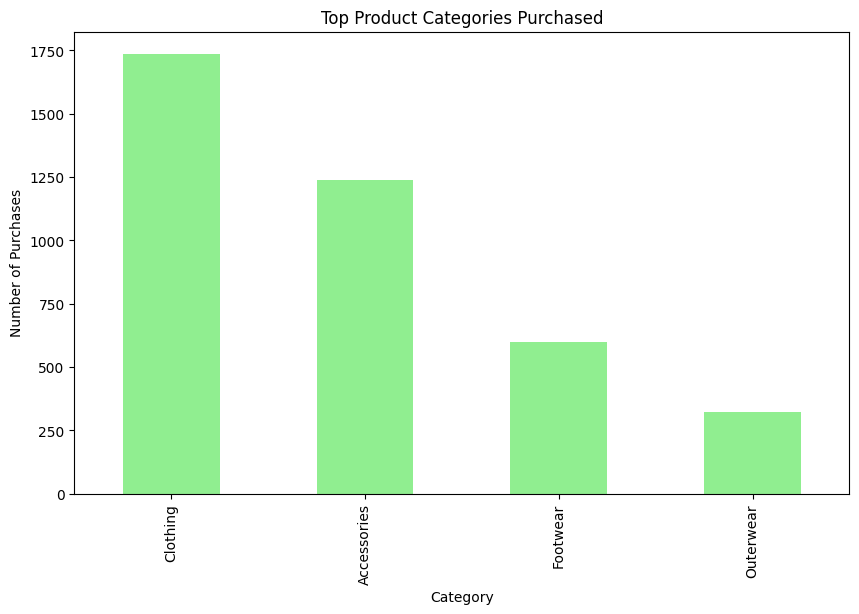

In [20]:
# 6. Top product categories purchased
plt.figure(figsize=(10, 6))
df['Category'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Top Product Categories Purchased')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.show()

In [38]:
import plotly.express as px

# Unstacked plot showing product category by gender
fig_category_vs_gender = px.bar(
    df,
    x='Category',
    color='Gender',
    title='Category vs. Gender Trends',
    barmode='group',  # Set to 'group' for unstacked visualization
    color_discrete_sequence=['#FF7F50', '#00CED1']
)

fig_category_vs_gender.update_layout(
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    xaxis_title='Product Category',
    yaxis_title='Count'
)

fig_category_vs_gender.show()

In [30]:
# Count popular sizes
size_counts = df['Size'].value_counts().reset_index()
size_counts.columns = ['Size', 'Count']

fig_sizes = px.bar(
    size_counts,
    x='Size',
    y='Count',
    text='Count',
    title='Preferred Sizes',
    color_discrete_sequence=['green']
)
fig_sizes.update_layout(
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    xaxis_title='Size',
    yaxis_title='Count of Purchases'
)
fig_sizes.show()

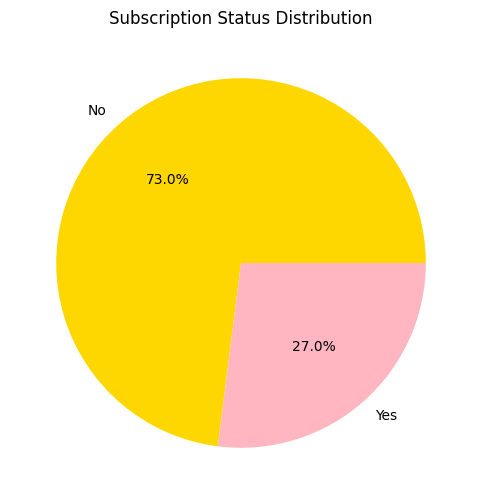

In [21]:
# 7. Subscription status distribution
plt.figure(figsize=(6, 6))
df['Subscription Status'].value_counts().plot.pie(autopct='%1.1f%%', colors=['gold', 'lightpink'])
plt.title('Subscription Status Distribution')
plt.ylabel('')
plt.show()

In [31]:
# Group data by subscription status and calculate the total purchase amount
subscription_data = df.groupby('Subscription Status')['Purchase Amount (USD)'].sum().reset_index()

fig_subscription = px.bar(
    subscription_data,
    x='Subscription Status',
    y='Purchase Amount (USD)',
    text='Purchase Amount (USD)',
    title='Impact of Subscription on Purchases',
    color='Subscription Status',
    color_discrete_sequence=px.colors.sequential.Viridis
)
fig_subscription.update_layout(
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    xaxis_title='Subscription Status',
    yaxis_title='Total Purchase Amount (USD)'
)
fig_subscription.show()

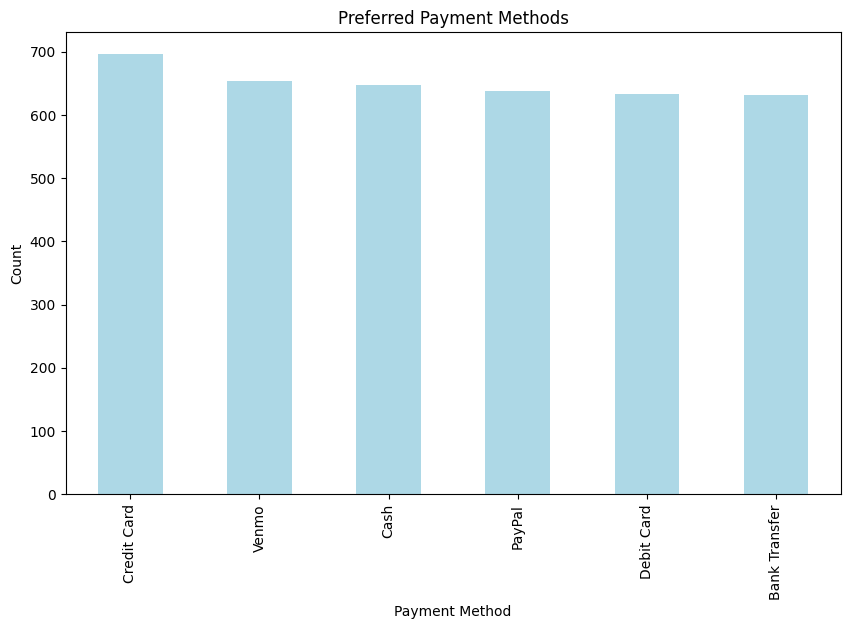

In [22]:
# 8. Payment method preference
plt.figure(figsize=(10, 6))
df['Payment Method'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Preferred Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

In [28]:
import plotly.express as px
# Count popular payment methods
payment_counts = df['Payment Method'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Count']

fig_payment = px.pie(
    payment_counts,
    names='Payment Method',
    values='Count',
    title='Popular Payment Methods',
    color_discrete_sequence=px.colors.sequential.Plasma
)
fig_payment.update_layout(
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig_payment.show()

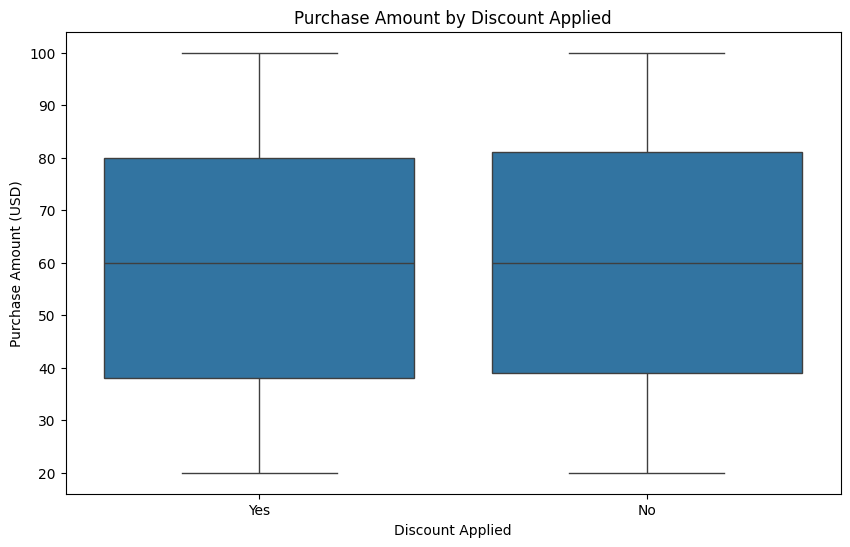

In [23]:
# 9. Purchase amount by discount applied
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount Applied', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount by Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Purchase Amount (USD)')
plt.show()

In [32]:
# Count purchases with and without discounts
discount_data = df['Discount Applied'].value_counts().reset_index()
discount_data.columns = ['Discount Applied', 'Count']

fig_discount = px.bar(
    discount_data,
    x='Discount Applied',
    y='Count',
    text='Count',
    title='Discount Usage Analysis',
    color='Discount Applied',
    color_discrete_sequence=px.colors.sequential.Cividis
)
fig_discount.update_layout(
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    xaxis_title='Discount Applied',
    yaxis_title='Number of Purchases'
)
fig_discount.show()

**Discounts have a noticeable effect on purchase amounts**

In [42]:
# Histogram for review ratings
fig_ratings = px.histogram(
    df,
    x='Review Rating',
    nbins=10,
    title='Distribution of Review Ratings',
    color_discrete_sequence=['#FFA07A']
)
fig_ratings.update_layout(
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    xaxis_title='Review Rating',
    yaxis_title='Count'
)
fig_ratings.show()

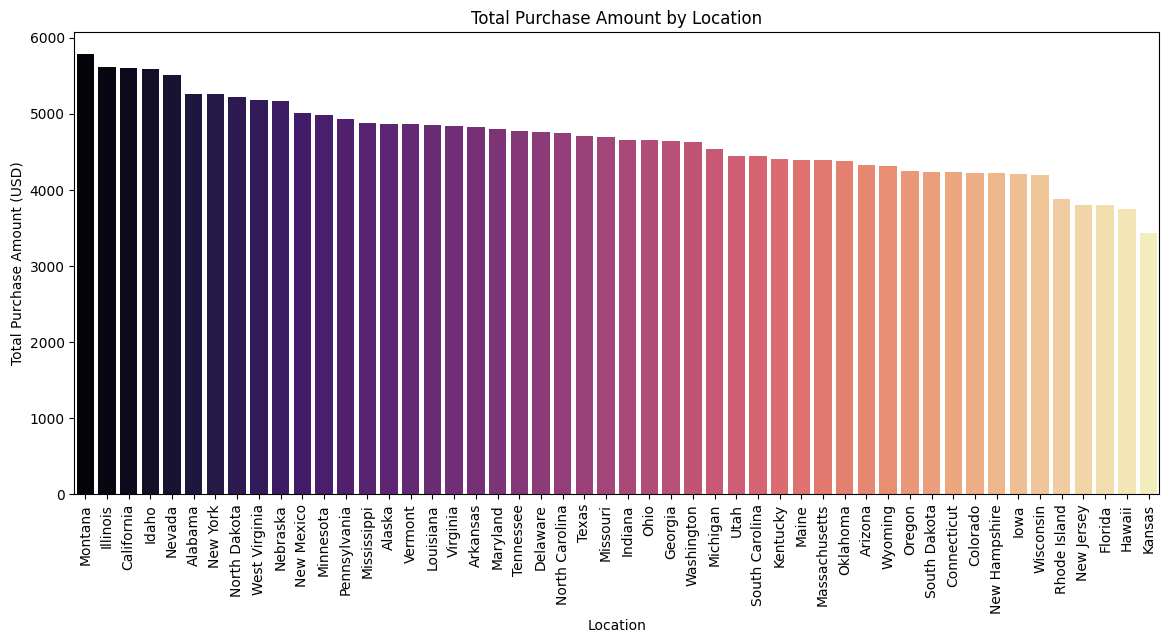

In [45]:
# 1. Total purchase amount by location
plt.figure(figsize=(14, 6))
location_purchase_sum = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
sns.barplot(x=location_purchase_sum.index, y=location_purchase_sum.values, palette='magma')
plt.title('Total Purchase Amount by Location')
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=90)
plt.show()

## **Revenue Analysis**

In [33]:
# Calculate total revenue for each category
category_revenue = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()

fig_category_revenue = px.treemap(
    category_revenue,
    path=['Category'],
    values='Purchase Amount (USD)',
    title='Category-Wise Revenue',
    color='Purchase Amount (USD)',
    color_continuous_scale=px.colors.sequential.Sunset
)
fig_category_revenue.update_layout(
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)
fig_category_revenue.show()

In [43]:
# Group data by shipping type and calculate total revenue
shipping_data = df.groupby('Shipping Type')['Purchase Amount (USD)'].sum().reset_index()

fig_shipping = px.bar(
    shipping_data,
    x='Shipping Type',
    y='Purchase Amount (USD)',
    text='Purchase Amount (USD)',
    title='Shipping Types and Revenue Impact',
    color='Shipping Type',
    color_discrete_sequence=px.colors.sequential.Teal
)
fig_shipping.update_layout(
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    xaxis_title='Shipping Type',
    yaxis_title='Total Revenue (USD)'
)
fig_shipping.show()